# CSE 190 NA4AI -- Assignment 2
## Dieter Joubert (A08497453)

In [23]:
import numpy as np
import matplotlib.pyplot as pyp
import math

## Part A

In [24]:
#page rank matrix
L = np.matrix([[0, 1./2., 0, 0], [1./3., 0, 0, 1./2.], [1./3., 0, 0, 1./2.], [1./3., 1./2., 1., 0]])

In [25]:
L

matrix([[0.        , 0.5       , 0.        , 0.        ],
        [0.33333333, 0.        , 0.        , 0.5       ],
        [0.33333333, 0.        , 0.        , 0.5       ],
        [0.33333333, 0.5       , 1.        , 0.        ]])

In [26]:
W, V = np.linalg.eig(L)

In [27]:
#eigenvalues
W

array([ 1.00000000e+00, -9.17517095e-02, -9.08248290e-01, -6.82897983e-17])

In [28]:
#eigenvectors
V

matrix([[-2.22988244e-01, -8.25340062e-01,  2.62323812e-01,
         -8.01783726e-01],
        [-4.45976488e-01,  1.51452723e-01, -4.76510307e-01,
          1.25887458e-16],
        [-4.45976488e-01,  1.51452723e-01, -4.76510307e-01,
          2.67261242e-01],
        [-7.43294146e-01,  5.22434615e-01,  6.90696802e-01,
          5.34522484e-01]])

In [29]:
r = np.array([[0.25], [0.25], [0.25], [0.25]])
r

array([[0.25],
       [0.25],
       [0.25],
       [0.25]])

In [30]:
# page rank iteration
for i in range(100):
    r = L.dot(r)
    r = r / np.linalg.norm(r)
    print(r.T)

[[0.2236068  0.372678   0.372678   0.81989159]]
[[0.19581511 0.50911929 0.50911929 0.66577138]]
[[0.24620506 0.38508996 0.38508996 0.80174467]]
[[0.19872764 0.49844803 0.49844803 0.68088652]]
[[0.24259975 0.39587627 0.39587627 0.79228108]]
[[0.20313953 0.48954186 0.48954186 0.69241018]]
[[0.23934942 0.40475026 0.40475026 0.78426164]]
[[0.20674167 0.48209619 0.48209619 0.70172958]]
[[0.2366074  0.41204534 0.41204534 0.77746654]]
[[0.20967442 0.47589066 0.47589066 0.70929035]]
[[0.23430561 0.41804274 0.41804274 0.77173921]]
[[0.21206645 0.47073073 0.47073073 0.71543902]]
[[0.23237998 0.42297438 0.42297438 0.76693213]]
[[0.21402069 0.46644771 0.46644771 0.72045   ]]
[[0.2307734  0.42703083 0.42703083 0.76291086]]
[[0.21561964 0.4628973  0.4628973  0.72454148]]
[[0.22943589 0.43036849 0.43036849 0.75955586]]
[[0.21692956 0.45995716 0.45995716 0.72788762]]
[[0.22832431 0.43311563 0.43311563 0.75676266]]
[[0.2180039  0.45752432 0.45752432 0.73062801]]
[[0.22740178 0.43537741 0.43537741 0.754

In [31]:
#r converges to the largest eigenvector 
w, v = np.linalg.eig(L)

#print the largest eigenvector (scaled by some scalar)
print("the largest eigenvector computed by numpy (that's what page-rank finds but scaled):")
print(v[:,0])

print("ratio of numpy eigv by page rank eigv (if all numbers are close the vectors are likely from the same eigenspace):")
print(v[:,0] / r.T)

the largest eigenvector computed by numpy (that's what page-rank finds but scaled):
[[-0.22298824]
 [-0.44597649]
 [-0.44597649]
 [-0.74329415]]
ratio of numpy eigv by page rank eigv (if all numbers are close the vectors are likely from the same eigenspace):
[[-1.00001    -0.4999941  -0.4999941  -0.30000228]
 [-2.00002    -0.9999882  -0.9999882  -0.60000456]
 [-2.00002    -0.9999882  -0.9999882  -0.60000456]
 [-3.33336667 -1.66664699 -1.66664699 -1.0000076 ]]


In [32]:
print("run page rank several times on different random starting vectors")
for trial in range(5):
    r = np.random.random((4,1))
    
    for i in range(100):
        r = L.dot(r)
        r = r / np.linalg.norm(r)
    print("trial %d -- final eigenvector after 100 iterations:" % trial)
    print(r.T)

run page rank several times on different random starting vectors
trial 0 -- final eigenvector after 100 iterations:
[[0.22299543 0.44595953 0.44595953 0.74331234]]
trial 1 -- final eigenvector after 100 iterations:
[[0.22298927 0.44597406 0.44597406 0.74329675]]
trial 2 -- final eigenvector after 100 iterations:
[[0.22298551 0.44598294 0.44598294 0.74328723]]
trial 3 -- final eigenvector after 100 iterations:
[[0.2229877  0.44597777 0.44597777 0.74329277]]
trial 4 -- final eigenvector after 100 iterations:
[[0.22299563 0.44595905 0.44595905 0.74331285]]


## Part B

In [33]:
h = 1./500.

xs = (-5) + np.array(range(0, (int) (1/h))) * 10 * h
ys = (-5) + np.array(range(0, (int) (1/h))) * 10 * h

xs = xs.reshape( (500,1) )
ys = ys.reshape( (1, 500) )

In [34]:
## - x^2 / 4 - y^2 / 4 + 2
def equationA(x,y):
    return -(x**2) / 4 - y**2 / 4 + 2

In [35]:
## 1 / (1 + e ^ (-x-y))
def equationB(x, y):
    return  1/(1 + np.exp(-(x)-(y)))

In [36]:
#
gradx_equationA = (equationA(xs+h,ys) - equationA(xs, ys) ) / h 
gradx_equationA

array([[ 2.4995,  2.4995,  2.4995, ...,  2.4995,  2.4995,  2.4995],
       [ 2.4895,  2.4895,  2.4895, ...,  2.4895,  2.4895,  2.4895],
       [ 2.4795,  2.4795,  2.4795, ...,  2.4795,  2.4795,  2.4795],
       ...,
       [-2.4705, -2.4705, -2.4705, ..., -2.4705, -2.4705, -2.4705],
       [-2.4805, -2.4805, -2.4805, ..., -2.4805, -2.4805, -2.4805],
       [-2.4905, -2.4905, -2.4905, ..., -2.4905, -2.4905, -2.4905]])

In [37]:
grady_equationA = (equationA(xs,ys+h) - equationA(xs, ys) ) / h 
grady_equationA

array([[ 2.4995,  2.4895,  2.4795, ..., -2.4705, -2.4805, -2.4905],
       [ 2.4995,  2.4895,  2.4795, ..., -2.4705, -2.4805, -2.4905],
       [ 2.4995,  2.4895,  2.4795, ..., -2.4705, -2.4805, -2.4905],
       ...,
       [ 2.4995,  2.4895,  2.4795, ..., -2.4705, -2.4805, -2.4905],
       [ 2.4995,  2.4895,  2.4795, ..., -2.4705, -2.4805, -2.4905],
       [ 2.4995,  2.4895,  2.4795, ..., -2.4705, -2.4805, -2.4905]])

In [38]:
gradx_equationB = (equationB(xs+h,ys) - equationB(xs, ys) ) / h 
gradx_equationB

array([[4.54412297e-05, 4.63591183e-05, 4.72955460e-05, ...,
        2.49782543e-01, 2.49904941e-01, 2.49977418e-01],
       [4.63591183e-05, 4.72955460e-05, 4.82508872e-05, ...,
        2.49904941e-01, 2.49977418e-01, 2.49999917e-01],
       [4.72955460e-05, 4.82508872e-05, 4.92255238e-05, ...,
        2.49977418e-01, 2.49999917e-01, 2.49972419e-01],
       ...,
       [2.49782543e-01, 2.49904941e-01, 2.49977418e-01, ...,
        5.11318941e-05, 5.01195163e-05, 4.91271809e-05],
       [2.49904941e-01, 2.49977418e-01, 2.49999917e-01, ...,
        5.01195163e-05, 4.91271809e-05, 4.81544912e-05],
       [2.49977418e-01, 2.49999917e-01, 2.49972419e-01, ...,
        4.91271809e-05, 4.81544912e-05, 4.72010584e-05]])

In [39]:
grady_equationB = (equationB(xs,ys+h) - equationB(xs, ys) ) / h 
grady_equationB

array([[4.54412297e-05, 4.63591183e-05, 4.72955460e-05, ...,
        2.49782543e-01, 2.49904941e-01, 2.49977418e-01],
       [4.63591183e-05, 4.72955460e-05, 4.82508872e-05, ...,
        2.49904941e-01, 2.49977418e-01, 2.49999917e-01],
       [4.72955460e-05, 4.82508872e-05, 4.92255238e-05, ...,
        2.49977418e-01, 2.49999917e-01, 2.49972419e-01],
       ...,
       [2.49782543e-01, 2.49904941e-01, 2.49977418e-01, ...,
        5.11318941e-05, 5.01195163e-05, 4.91271809e-05],
       [2.49904941e-01, 2.49977418e-01, 2.49999917e-01, ...,
        5.01195163e-05, 4.91271809e-05, 4.81544912e-05],
       [2.49977418e-01, 2.49999917e-01, 2.49972419e-01, ...,
        4.91271809e-05, 4.81544912e-05, 4.72010584e-05]])

## PART C

In [40]:
h = 0.001
xs = np.array(range(0,(int)(1/h)))  * h

In [41]:
##-(x**2) / 4 - (1/4) + 2
def equaA(x):
    return -(x**2) / 4 - (1/4) + 2

ys_A = [ (equaA(x+h) - equaA(x) )/h  for x in xs ]

ys_A

[-0.0002500000000349445,
 -0.0007499999998827889,
 -0.0012500000001747225,
 -0.0017499999998005222,
 -0.002250000000092456,
 -0.0027499999999403,
 -0.003250000000010189,
 -0.003750000000080078,
 -0.0042499999999279225,
 -0.0047499999999978115,
 -0.0052500000000677005,
 -0.005749999999915545,
 -0.006249999999985434,
 -0.006750000000055323,
 -0.007250000000125212,
 -0.007749999999973056,
 -0.008250000000042945,
 -0.00874999999989079,
 -0.009249999999960679,
 -0.009750000000030568,
 -0.010250000000100457,
 -0.010749999999948301,
 -0.01125000000001819,
 -0.011749999999866034,
 -0.012250000000157968,
 -0.012750000000005812,
 -0.013249999999853657,
 -0.01375000000014559,
 -0.014249999999993435,
 -0.014749999999841279,
 -0.015250000000133213,
 -0.015749999999981057,
 -0.016250000000050946,
 -0.01674999999989879,
 -0.01724999999996868,
 -0.017750000000038568,
 -0.018250000000108457,
 -0.0187499999999563,
 -0.01925000000002619,
 -0.019749999999874035,
 -0.020249999999943924,
 -0.020750000000013

In [42]:
## 1/(1 + np.exp(-x-1))

def equaB(x):
    return  1/(1 + np.exp(-(x)-1))

ys_B = [ (equaB(x+h) - equaB(x) )/h  for x in xs ]

ys_B

[0.1965664984852067,
 0.19647560548397003,
 0.19638467734228726,
 0.1962937141837262,
 0.19620271613163265,
 0.1961116833091303,
 0.19602061583934294,
 0.19592951384594937,
 0.19583837745162924,
 0.19574720677972834,
 0.1956560019533704,
 0.19556476309512405,
 0.195473490328113,
 0.19538218377568306,
 0.19529084355984772,
 0.19519946980395275,
 0.19510806263045577,
 0.19501662216214743,
 0.19492514852159637,
 0.19483364183103813,
 0.1947421022133744,
 0.1946505297910628,
 0.1945589246861168,
 0.19446728702110505,
 0.19437561691793004,
 0.19428391449960447,
 0.1941921798873647,
 0.19410041320366833,
 0.19400861457086194,
 0.1939167841102929,
 0.1938249219444188,
 0.19373302819469806,
 0.19364110298303316,
 0.1935491464314376,
 0.19345715866103674,
 0.1933651397939551,
 0.19327308995165104,
 0.19318100925524995,
 0.19308889782654326,
 0.19299675578665632,
 0.19290458325738058,
 0.19281238035928627,
 0.19272014721405384,
 0.19262788394247554,
 0.19253559066578774,
 0.19244326750511576,
 0

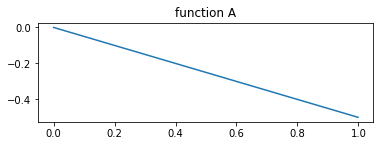

In [43]:
pyp.subplot(2,1,1)
pyp.plot(xs, ys_A)
pyp.title("function A")

pyp.show()

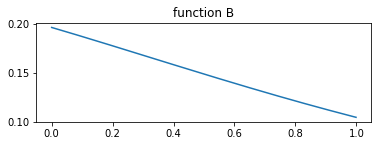

In [44]:
pyp.subplot(2,1,1)
pyp.plot(xs, ys_B)
pyp.title("function B")

pyp.show()